<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_1_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.456165,45.889965,0.081457,82.427588,82.356504,0.071084
1,0.0,1.0,66.011520,26.701349,0.110637,102.823506,102.694549,0.128958
2,0.0,2.0,89.215732,63.952954,-0.083452,163.085234,163.152243,-0.067010
3,0.0,3.0,33.973522,35.622653,-0.082923,79.513252,79.598542,-0.085289
4,0.0,4.0,65.609048,85.574865,0.040705,161.224618,161.188518,0.036100
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.369747,79.026003,-0.006948,162.388802,162.402079,-0.013277
119996,999.0,116.0,66.180431,54.723065,0.001401,130.904897,130.905602,-0.000706
119997,999.0,117.0,96.716331,79.222390,-0.108438,185.830283,185.948011,-0.117728
119998,999.0,118.0,37.611898,71.746364,0.090517,119.448779,119.359103,0.089676


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.456165  45.889965  0.081457   82.427588   82.356504  0.071084
      1.0    66.011520  26.701349  0.110637  102.823506  102.694549  0.128958
      2.0    89.215732  63.952954 -0.083452  163.085234  163.152243 -0.067010
      3.0    33.973522  35.622653 -0.082923   79.513252   79.598542 -0.085289
      4.0    65.609048  85.574865  0.040705  161.224618  161.188518  0.036100
...                ...        ...       ...         ...         ...       ...
999.0 115.0  73.369747  79.026003 -0.006948  162.388802  162.402079 -0.013277
      116.0  66.180431  54.723065  0.001401  130.904897  130.905602 -0.000706
      117.0  96.716331  79.222390 -0.108438  185.830283  185.948011 -0.117728
      118.0  37.611898  71.746364  0.090517  119.448779  119.359103  0.089676
      119.0  21.202504  89.192254 -0.028121  120.366636  120.395918 -0.029282

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.456165  45.889965  0.081457   82.427588   82.356504  0.071084
      1.0    66.011520  26.701349  0.110637  102.823506  102.694549  0.128958
      2.0    89.215732  63.952954 -0.083452  163.085234  163.152243 -0.067010
      3.0    33.973522  35.622653 -0.082923   79.513252   79.598542 -0.085289
      4.0    65.609048  85.574865  0.040705  161.224618  161.188518  0.036100
...                ...        ...       ...         ...         ...       ...
999.0 115.0  73.369747  79.026003 -0.006948  162.388802  162.402079 -0.013277
      116.0  66.180431  54.723065  0.001401  130.904897  130.905602 -0.000706
      117.0  96.716331  79.222390 -0.108438  185.830283  185.948011 -0.117728
      118.0  37.611898  71.746364  0.090517  119.448779  119.359103  0.089676
      119.0  21.202504  89.192254 -0.028121  120.366636  120.395918 -0.029282

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,26.456165,45.889965,0.081457,82.427588,82.356504,0.071084
1,0.0,1.0,66.011520,26.701349,0.110637,102.823506,102.694549,0.128958
2,0.0,2.0,89.215732,63.952954,-0.083452,163.085234,163.152243,-0.067010
3,0.0,3.0,33.973522,35.622653,-0.082923,79.513252,79.598542,-0.085289
4,0.0,4.0,65.609048,85.574865,0.040705,161.224618,161.188518,0.036100
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,73.369747,79.026003,-0.006948,162.388802,162.402079,-0.013277
119996,999.0,116.0,66.180431,54.723065,0.001401,130.904897,130.905602,-0.000706
119997,999.0,117.0,96.716331,79.222390,-0.108438,185.830283,185.948011,-0.117728
119998,999.0,118.0,37.611898,71.746364,0.090517,119.448779,119.359103,0.089676


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    26.456165  45.889965  0.081457   82.427588   82.356504  0.071084
      1.0    66.011520  26.701349  0.110637  102.823506  102.694549  0.128958
      2.0    89.215732  63.952954 -0.083452  163.085234  163.152243 -0.067010
      3.0    33.973522  35.622653 -0.082923   79.513252   79.598542 -0.085289
      4.0    65.609048  85.574865  0.040705  161.224618  161.188518  0.036100
...                ...        ...       ...         ...         ...       ...
999.0 115.0  73.369747  79.026003 -0.006948  162.388802  162.402079 -0.013277
      116.0  66.180431  54.723065  0.001401  130.904897  130.905602 -0.000706
      117.0  96.716331  79.222390 -0.108438  185.830283  185.948011 -0.117728
      118.0  37.611898  71.746364  0.090517  119.448779  119.359103  0.089676
      119.0  21.202504  89.192254 -0.028121  120.366636  120.395918 -0.029282

[120000 rows x 6 columns]

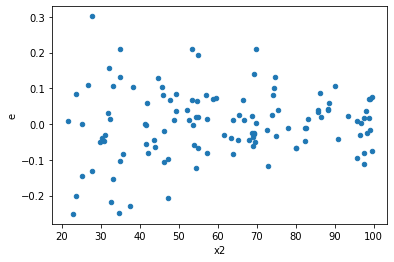

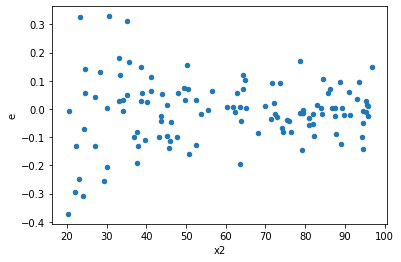

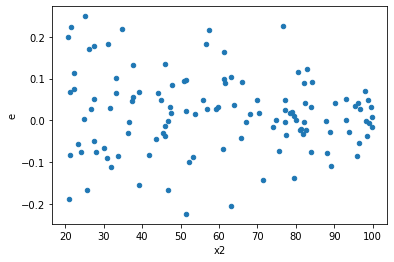

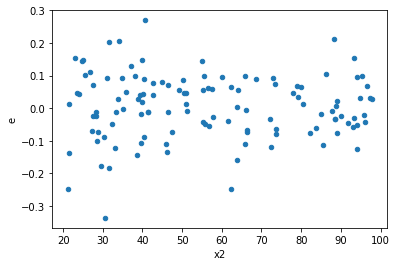

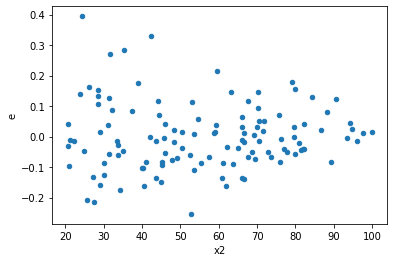

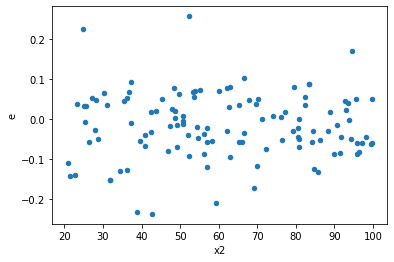

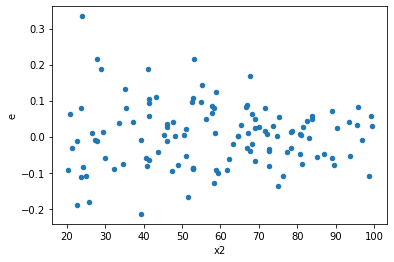

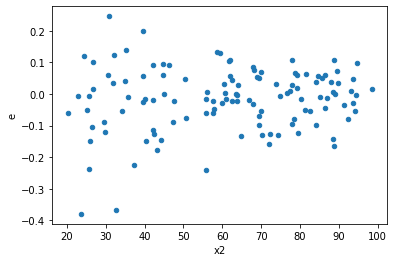

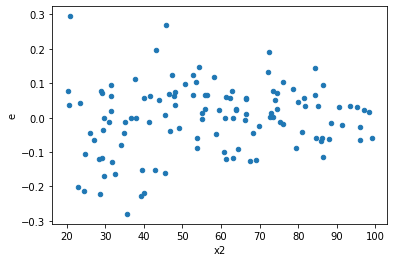

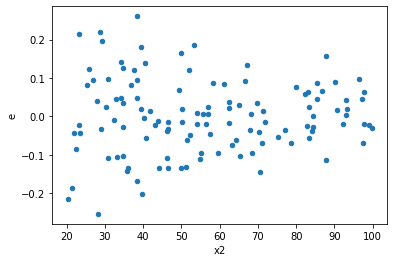

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,61.0,55.0,0.3130213599021355,1.1915753129610838,0.005131497703313696,0.021665005690201522,4.221965387651097,2.2051613690621252e-07,0.9999998897419315,1.1025806845310626e-07,Reject001=0 : Heteroscedasticity
4.0,62.0,54.0,0.579666060644817,0.7920926332673185,0.009349452591045434,0.014668382097542934,1.5689027731518503,0.09261070814327343,0.9536946459283633,0.04630535407163672,Reject001=1 : Homoscedasticity
5.0,59.0,57.0,0.3725742085824476,0.37568543885164407,0.006314817094617756,0.006590972611432352,1.0437313563760966,0.872313080390628,0.563843459804686,0.436156540195314,Reject001=1 : Homoscedasticity
6.0,49.0,67.0,0.3432650299452687,0.5248917667989458,0.007005408774393239,0.00783420547461113,1.1183081140457325,0.6645129786349884,0.6677435106825058,0.3322564893174942,Reject001=1 : Homoscedasticity
7.0,54.0,62.0,0.4496984842368493,0.7201564084165573,0.008327749708089803,0.011615425942202537,1.3947856683203381,0.20531119946800347,0.8973444002659983,0.10265559973400173,Reject001=1 : Homoscedasticity
9.0,51.0,65.0,0.2777351670474763,0.8109188741992756,0.0054457875891662025,0.012475674987681162,2.290885346409792,0.0016986994042853532,0.9991506502978573,0.0008493497021426766,Reject001=0 : Heteroscedasticity
10.0,60.0,56.0,0.27163751790955626,0.8246281678332742,0.004527291965159271,0.014725502997022754,3.252607322511109,1.5640289459328827e-05,0.9999921798552703,7.820144729664413e-06,Reject001=0 : Heteroscedasticity
11.0,57.0,59.0,0.32806408676480625,0.8662531944467607,0.005755510294119408,0.014682257532995945,2.5509914469264845,0.000466919265704524,0.9997665403671477,0.000233459632852262,Reject001=0 : Heteroscedasticity
13.0,65.0,51.0,0.3593891566239359,0.690837751437214,0.005529063948060552,0.013545838263474785,2.449933368599635,0.001143464550599882,0.9994282677247001,0.000571732275299941,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,69.0,0.5331303602848567,0.48469903955110544,0.011343199154996951,0.0070246237616102235,0.619280651395044,0.08316376167338224,Reject001=1 : Homoscedasticity
1.0,61.0,55.0,0.3130213599021355,1.1915753129610838,0.005131497703313696,0.021665005690201522,4.221965387651097,2.2051613690621252e-07,Reject001=0 : Heteroscedasticity
2.0,60.0,56.0,0.7526096257024127,0.2758475263103344,0.01254349376170688,0.004925848684113114,0.3927014895284502,0.00046250397329502694,Reject001=0 : Heteroscedasticity
3.0,67.0,49.0,0.7632388780206616,0.34900871670433364,0.011391625045084501,0.007122626871517013,0.6252511685846291,0.07408339573463468,Reject001=1 : Homoscedasticity
4.0,62.0,54.0,0.579666060644817,0.7920926332673185,0.009349452591045434,0.014668382097542934,1.5689027731518503,0.09261070814327343,Reject001=1 : Homoscedasticity
5.0,59.0,57.0,0.3725742085824476,0.37568543885164407,0.006314817094617756,0.006590972611432352,1.0437313563760966,0.872313080390628,Reject001=1 : Homoscedasticity
6.0,49.0,67.0,0.3432650299452687,0.5248917667989458,0.007005408774393239,0.00783420547461113,1.1183081140457325,0.6645129786349884,Reject001=1 : Homoscedasticity
7.0,54.0,62.0,0.4496984842368493,0.7201564084165573,0.008327749708089803,0.011615425942202537,1.3947856683203381,0.20531119946800347,Reject001=1 : Homoscedasticity
8.0,62.0,54.0,0.6400801110338641,0.5122315990297488,0.01032387275861071,0.009485770352402756,0.9188189911088425,0.7439886394442882,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      560
Reject001=0 : Heteroscedasticity    440
Name: Result_test, dtype: int64